# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nurunnisa Fathanah Dz. S. B.
- **Email:** fathanah.uni@gmail.com
- **ID Dicoding:** fathanahdz

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penyewaan sepeda pada tahun 2011 dan 2012? 
2. Bagaimana pngaruh musim terhadap penyewaan sepeda?
3. Bagaimana pengaruh hari dalam seminggu terhadap penyewaan sepeda?
4. Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat tabel `day`

In [2]:
day_df = pd.read_csv("Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat tabel `hour`

In [3]:
hour_df = pd.read_csv("Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Accessing data `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Ketidaksesuaian tipe data kolom **dteday** seharusnya direprentasikan dengan tipe data **datetime** bukan **object**

##### Mengecek Missing Value

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

##### Mengecek Duplikasi

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Memeriksa parameter statistik dari kolom numerik yang terdapat dalam `day_df`

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada masalah/keanehan dari parameter statistik.

#### Accessing Data `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Ketidaksesuaian tipe data kolom **dteday** seharusnya direprentasikan dengan tipe data **datetime** bukan **object**.

##### Mengecek Missing Value

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Mengecek Duplikasi

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Memeriksa parameter statistik dari kolom numerik yang terdapat dalam `hour_df`

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada masalah/keanehan dari parameter statistik.

### Problem:
Untuk **day_df** dan **hour_df**, terdapat ketidaksesuaian tipe data yang perlu diperbaiki pada **dteday** seharusnya direprentasikan dengan tipe data **datetime** bukan **object**

### Cleaning Data

#### Cleaning data day.csv

Memperbaiki nama kolom untuk meningkatkan keterbacaan

In [12]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'count',
}, inplace=True)

##### Mengubah tipe data untuk kolom dateday `day_df`

In [13]:
day_df["dateday"] = pd.to_datetime(day_df["dateday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengganti nilai tahun 0 menjadi 2011 dan 1 menjadi 2012.

In [14]:
day_df['year'] = day_df['year'].replace(0, "2011").replace(1,"2012")
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
day_df['season'] = day_df['season'].replace(1, "Spring").replace(2,"Summer").replace(3, "Fall").replace(4,"Winter")
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
day_df['weather'] = day_df['weather'].replace(1, "Clear").replace(2,"Mist").replace(3, "Light Snow").replace(4,"Heavy Rain")
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,1,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Cleaning Data hour.csv

##### Memperbaiki nama kolom untuk meningkatkan keterbacaan

In [17]:
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather',
    'cnt': 'count',
}, inplace=True)

Mengganti nilai tahun 0 menjadi 2011 dan 1 menjadi 2012.

In [18]:
hour_df['year'] = hour_df['year'].replace(0, "2011").replace(1,"2012")
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
hour_df['season'] = hour_df['season'].replace(1, "Spring").replace(2,"Summer").replace(3, "Fall").replace(4,"Winter")
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
hour_df['weather'] = hour_df['weather'].replace(1, "Clear").replace(2,"Mist").replace(3, "Light Snow").replace(4,"Heavy Rain")
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


##### Mengubah tipe data untuk kolom dteday `hour_df`

In [21]:
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   year        17379 non-null  object        
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data `day_df`

#### Explorasi penyewaan sepeda berdasarkan bulan untuk setiap tahun

In [22]:
day_df.groupby(by=["year", "month"]).agg({
    "instant": "nunique",
    "registered": ['min', 'max', 'mean'],
    "casual": ['min', 'max', 'mean'],
    "count": ["min", "max", "mean"],
})

instant registered                    casual                     \
           nunique        min   max         mean    min   max         mean   
year month                                                                   
2011 1          31        416  1844  1132.774194      9   331    99.129032   
     2          28        905  2348  1499.035714     47   694   222.928571   
     3          31        491  2355  1652.225806     46  1424   413.741935   
     4          30        674  3722  2417.466667    121  1965   744.866667   
     5          31       2213  4238  3379.709677    255  2355  1001.612903   
     6          30       2993  4488  3763.333333    513  1920  1020.400000   
     7          31       2298  4220  3383.516129    562  3065  1175.870968   
     8          31        889  4614  3479.000000    226  1914   930.387097   
     9          30       1689  4372  3362.433333    118  2521   884.833333   
     10         31        570  4267  3170.612903     57  2397   813.612903   
     11         30        935  3891  2885.766667     69  1275   519.800000   
     12         31        451  3672  2544.354839     50   706   272.516129   
2012 1          31       1234  4185  2831.451613     67  1070   289.322581   
     2          29       1456  4546  3255.724138     65  1435   300.724138   
     3          31       2339  5893  4298.612903    203  3155  1019.935484   
     4          30        907  5950  4525.600000    120  3252  1281.866667   
     5          31       2501  6433  4891.290323    342  3410  1426.935484   
     6          30       3594  6456  5317.866667    477  2963  1443.133333   
     7          31       3195  6790  5222.645161    747  2562  1345.322581   
     8          31       3341  6541  5526.000000    935  2827  1393.451613   
     9          30       3197  6946  5826.500000    371  3160  1459.266667   
     10         31         20  6911  5300.096774      2  3031  1114.129032   
     11         30       1470  5520  4388.500000    123  2290   700.300000   
     12         31        432  6055  3563.483871      9  1153   427.258065   

           count                     
             min   max         mean  
year month                           
2011 1       431  1985  1231.903226  
     2      1005  2927  1721.964286  
     3       605  3239  2065.967742  
     4       795  5312  3162.333333  
     5      2633  5805  4381.322581  
     6      3767  5515  4783.733333  
     7      3285  6043  4559.387097  
     8      1115  5895  4409.387097  
     9      1842  5423  4247.266667  
     10      627  5511  3984.225806  
     11     1495  4486  3405.566667  
     12      705  3940  2816.870968  
2012 1      1301  4521  3120.774194  
     2      1529  5062  3556.448276  
     3      3194  8362  5318.548387  
     4      1027  7460  5807.466667  
     5      2843  8294  6318.225806  
     6      4127  8120  6761.000000  
     7      4459  8173  6567.967742  
     8      4549  7865  6919.451613  
     9      4073  8714  7285.766667  
     10       22  8156  6414.225806  
     11     2277  6852  5088.800000  
     12      441  6606  3990.741935

#### Explorasi penyewaan sepeda setiap tahun

In [23]:
day_df.groupby(by='year').agg({  
    'registered': ['min', 'max', 'mean'],
    'casual': ['min', 'max', 'mean'],
    'count': ['min', 'max', 'mean'],
})

registered                    casual                    count        \
            min   max         mean    min   max         mean   min   max   
year                                                                       
2011        416  4614  2728.358904      9  3065   677.402740   431  6043   
2012         20  6946  4581.450820      2  3410  1018.483607    22  8714   

                   
             mean  
year               
2011  3405.761644  
2012  5599.934426

#### Explorasi penyewaan sepeda harian

In [24]:
day_df.groupby(by='weekday').agg({
    "instant": "nunique",
    "registered": ['min', 'max', 'mean'],
    "casual": ['min', 'max', 'mean'],
    "count": ["min", "max", "mean"],
})

instant registered                    casual                    count  \
        nunique        min   max         mean    min   max         mean   min   
weekday                                                                         
0           105        451  5657  2890.533333     54  3283  1338.295238   605   
1           105         20  6435  3663.990476      2  3065   674.133333    22   
2           104        573  6697  3954.480769      9  1348   556.182692   683   
3           104        432  6946  3997.394231      9  2562   551.144231   441   
4           104        416  6781  4076.298077     15  1405   590.961538   431   
5           104       1129  6917  3938.000000     38  2469   752.288462  1167   
6           105        570  5966  3085.285714     57  3410  1465.257143   627   

                            
          max         mean  
weekday                     
0        8227  4228.828571  
1        7525  4338.123810  
2        7767  4510.663462  
3        8173  4548.538462  
4        7804  4667.259615  
5        8362  4690.288462  
6        8714  4550.542857

#### Eksplorasi penyewaan sepeda berdasarkan musim

In [25]:
day_df.groupby(by=['season']).agg({
    "registered": ['min', 'max', 'mean'],
    "casual": ['min', 'max', 'mean'],
    "count": ['min', 'max', 'mean']
})

registered                    casual                    count        \
              min   max         mean    min   max         mean   min   max   
season                                                                       
Fall          889  6917  4441.691489    118  3160  1202.611702  1115  8714   
Spring        416  5315  2269.204420      9  3155   334.928177   431  7836   
Summer        674  6456  3886.233696    120  3410  1106.097826   795  8362   
Winter         20  6946  3999.050562      2  3031   729.112360    22  8555   

                     
               mean  
season               
Fall    5644.303191  
Spring  2604.132597  
Summer  4992.331522  
Winter  4728.162921

##### Eksplorasi data berdasarkan cuaca

In [26]:
day_df.groupby(by=['weather']).agg({
    "registered": ['min', 'max', 'mean'],
    "casual": ['min', 'max', 'mean'],
    "count": ['min', 'max', 'mean']
})

registered                    casual                   count        \
                  min   max         mean    min   max        mean   min   max   
weather                                                                         
Clear             416  6946  3912.755940     15  3410  964.030238   431  8714   
Light Snow         20  4324  1617.809524      2  1264  185.476190    22  4639   
Mist              491  6844  3348.510121      9  3155  687.352227   605  8362   

                         
                   mean  
weather                  
Clear       4876.786177  
Light Snow  1803.285714  
Mist        4035.862348

### Explore Data `hour_df`

#### Explorasi waktu penyewaan berdasarkan jam untuk sepeda setiap tahun

In [27]:
hour_df.groupby(by=["year","hour"]).agg({
    "instant": "nunique",
    "registered": ['min', 'max', 'mean'],
    "casual": ['min', 'max', 'mean'],
    "count": ["min", "max", "mean"],
})

instant registered                  casual                 count  \
          nunique        min  max        mean    min  max       mean   min   
year hour                                                                    
2011 0        361          0  136   33.565097      0   68   9.481994     2   
     1        360          0  104   20.797222      0   43   5.752778     1   
     2        352          0   79   14.463068      0   33   4.460227     1   
     3        342          0   42    7.271930      0   25   2.789474     1   
     4        337          0   11    4.112760      0   13   1.278932     1   
     5        353          0   35   13.396601      0   15   1.212465     1   
     6        361          0  138   53.806094      0   19   3.814404     1   
     7        363          1  350  146.451791      0   35  10.380165     1   
     8        363          4  514  243.796143      0   68  19.198347     5   
     9        363          6  274  139.454545      0  142  24.418733    14   
     10       363         12  233   94.892562      0  166  35.991736    12   
     11       363          5  270  110.236915      0  215  45.680441    10   
     12       364          3  298  137.890110      0  237  52.214286     3   
     13       364          9  302  135.129121      0  256  55.362637    11   
     14       364         12  502  124.684066      0  272  57.958791    12   
     15       364          4  423  131.118132      0  262  57.315934     7   
     16       365          8  356  177.761644      0  236  56.819178    11   
     17       365         14  567  290.846575      0  240  58.830137    15   
     18       363         23  537  272.504132      0  222  49.768595    23   
     19       363         11  397  196.355372      0  178  40.013774    11   
     20       363          8  301  142.859504      0  195  30.192837    11   
     21       363          6  262  110.275482      0  195  24.366391     6   
     22       363          9  211   84.424242      0  115  19.369146     9   
     23       363          2  141   55.435262      0   70  13.754821     2   
2012 0        365          3  234   53.802740      0   59  10.827397     3   
     1        364          1  139   32.879121      0   49   7.247253     2   
     2        363          1  104   21.622590      0   44   5.074380     1   
     3        355          0   61   10.687324      0   26   2.645070     1   
     4        360          0   22    6.022222      0   12   1.230556     1   
     5        364          1   64   23.406593      0   16   1.604396     1   
     6        364          1  203   89.810440      0   19   4.505495     1   
     7        364          6  572  255.417582      0   40  11.728022     6   
     8        364         10  808  430.609890      0   69  24.153846    11   
     9        364         21  399  237.247253      1  130  37.346154    23   
     10       364          8  351  159.401099      0  209  56.934066     8   
     11       364          9  446  186.862637      0  268  73.362637    10   
     12       364         10  526  232.153846      0  362  84.373626    10   
     13       365         15  491  227.449315      0  355  89.208219    15   
     14       365         20  448  205.967123      0  361  93.128767    20   
     15       365         13  456  221.413699      0  357  92.446575    13   
     16       365         13  481  298.715068      0  367  90.671233    13   
     17       365         19  885  483.509589      2  347  89.717808    26   
     18       365         20  886  455.772603      1  266  72.410959    26   
     19       365         14  662  328.786301      0  230  57.479452    18   
     20       365         17  461  236.476712      0  237  42.241096    23   
     21       365          9  362  177.657534      0  222  32.123288    11   
     22       365          5  327  133.605479      0  175  25.120548    11   
     23       365          8  220   89.734247      0   71  16.635616     9   

                            
  

#### Eksplorasi penyewaan sepeda berdasarkan jam untuk setiap bulan

In [28]:
hour_df.groupby(by=["month","hour"]).agg({
    "instant": "nunique",
    "registered": ['min', 'max', 'mean'],
    "casual": ['min', 'max', 'mean'],
    "count": ["min", "max", "mean"],
})

instant registered                  casual                count  \
           nunique        min  max        mean    min max       mean   min   
month hour                                                                   
1     0         60          3   81   21.966667      0  15   2.400000     3   
      1         60          0   78   15.283333      0  15   1.866667     1   
      2         58          1   59   11.637931      0  16   1.517241     1   
      3         47          0   41    6.829787      0  11   1.319149     1   
      4         54          1    9    2.722222      0   2   0.277778     1   
...            ...        ...  ...         ...    ...  ..        ...   ...   
12    19        62         14  444  187.564516      1  46  13.032258    16   
      20        62         17  287  132.290323      0  34   9.725806    23   
      21        62          6  252  102.951613      0  34   8.903226     6   
      22        62          5  155   76.338710      0  26   7.032258    11   
      23        62          8  144   54.903226      0  18   5.161290    10   

                             
            max        mean  
month hour                   
1     0      96   24.366667  
      1      93   17.150000  
      2      75   13.155172  
      3      52    8.148936  
      4      10    3.000000  
...         ...         ...  
12    19    471  200.596774  
      20    306  142.016129  
      21    280  111.854839  
      22    181   83.370968  
      23    162   60.064516  

[288 rows x 10 columns]

#### Eksplorasi penyewaan sepeda berdasarkan jam untuk setiap musim

In [29]:
hour_df.groupby(by=["season","hour"]).agg({
    "instant": "nunique",
    "registered": ['min', 'max', 'mean'],
    "casual": ['min', 'max', 'mean'],
    "count": ["min", "max", "mean"],
})

instant registered                  casual                 count  \
            nunique        min  max        mean    min  max       mean   min   
season hour                                                                    
Fall   0        187          7  170   57.374332      1   63  16.540107     8   
       1        186          3  119   34.069892      0   49   9.650538     4   
       2        186          0  104   23.677419      0   34   7.053763     2   
       3        186          0   42   11.736559      0   25   4.016129     1   
       4        187          0   22    6.518717      0   12   1.721925     1   
...             ...        ...  ...         ...    ...  ...        ...   ...   
Winter 19       177         13  662  267.728814      2  119  29.305085    28   
       20       177         17  449  189.745763      1   88  22.395480    26   
       21       177          6  328  142.932203      0   78  18.395480     6   
       22       177         13  232  108.299435      0   63  15.265537    13   
       23       177         12  199   75.531073      0   52  10.909605    13   

                              
             max        mean  
season hour                   
Fall   0     207   73.914439  
       1     168   43.720430  
       2     122   30.731183  
       3      60   15.752688  
       4      28    8.240642  
...          ...         ...  
Winter 19    743  297.033898  
       20    497  212.141243  
       21    360  161.327684  
       22    264  123.564972  
       23    220   86.440678  

[96 rows x 10 columns]

#### Eksplorasi penyewaan sepeda berdasarkan hari

In [30]:
hour_df.groupby(by=["weekday","hour"]).agg({
    "instant": "nunique",
    "registered": ['min', 'max', 'mean'],
    "casual": ['min', 'max', 'mean'],
    "count": ["min", "max", "mean"],
})

instant registered                  casual                 count  \
             nunique        min  max        mean    min  max       mean   min   
weekday hour                                                                    
0       0        104          4  147   75.759615      0   59  18.230769     6   
        1        104          2  139   62.432692      0   49  15.000000     4   
        2        102          2  104   49.039216      0   44  12.588235     2   
        3        104          3   61   22.778846      0   26   8.365385     4   
        4        102          0   22    6.833333      0   13   2.529412     1   
...              ...        ...  ...         ...    ...  ...        ...   ...   
6       19       104         24  369  168.519231      0  203  71.413462    25   
        20       104         19  260  130.278846      0  158  50.586538    24   
        21       104         13  248  116.076923      0  105  39.923077    14   
        22       104         12  234  104.711538      0  104  34.951923    20   
        23       104         16  185   90.076923      0   71  25.778846    17   

                               
              max        mean  
weekday hour                   
0       0     188   93.990385  
        1     168   77.432692  
        2     132   61.627451  
        3      79   31.144231  
        4      28    9.362745  
...           ...         ...  
6       19    554  239.932692  
        20    399  180.865385  
        21    338  156.000000  
        22    338  139.663462  
        23    239  115.855769  

[168 rows x 10 columns]

##### Eksplorasi penyewaan sepeda berdasarkan cuaca

In [31]:
hour_df.groupby(by=['weather']).agg({
    "registered": ['min', 'max', 'mean'],
    "casual": ['min', 'max', 'mean'],
    "count": ['min', 'max', 'mean']
})

registered                  casual                 count       \
                  min  max        mean    min  max       mean   min  max   
weather                                                                    
Clear               0  886  164.323841      0  367  40.545431     1  977   
Heavy Rain         22  158   71.666667      1    6   2.666667    23  164   
Light Snow          0  791   95.523608      0  263  16.055673     1  891   
Mist                0  822  145.570202      0  350  29.595290     1  957   

                        
                  mean  
weather                 
Clear       204.869272  
Heavy Rain   74.333333  
Light Snow  111.579281  
Mist        175.165493

In [32]:
all_df = pd.merge(
    left = day_df,
    right = hour_df,
    how = "outer",
    left_on = "dateday",
    right_on = "dateday"
)
all_df.head()

,instant_x,dateday,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weather_x,temp_x,...,weekday_y,workingday_y,weather_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,count_y
0,1,2011-01-01,Spring,2011,1,0,6,0,Mist,0.344167,...,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,Spring,2011,1,0,6,0,Mist,0.344167,...,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,Spring,2011,1,0,6,0,Mist,0.344167,...,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,Spring,2011,1,0,6,0,Mist,0.344167,...,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,Spring,2011,1,0,6,0,Mist,0.344167,...,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda pada tahun 2011 dan 2012? 

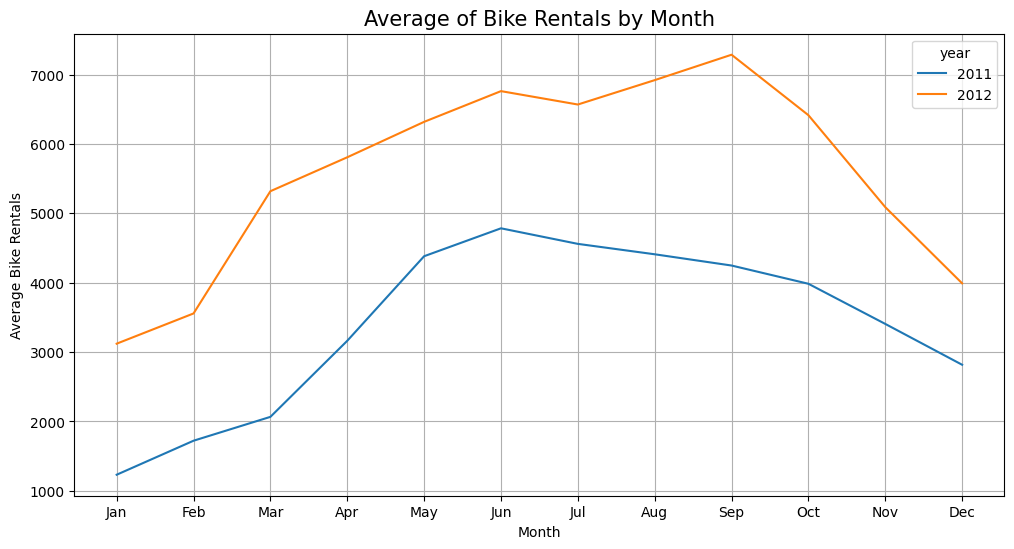

In [33]:
monthly_rental_df = day_df.groupby(['year', 'month'])[['count']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="count", hue="year",data=monthly_rental_df) 
plt.xlabel("Month")
plt.ylabel("Average Bike Rentals")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.title("Average of Bike Rentals by Month", loc="center", fontsize=15)

plt.show()

### Pertanyaan 2: Bagaimana rerata penyewaan sepeda berdasarkan jam? 

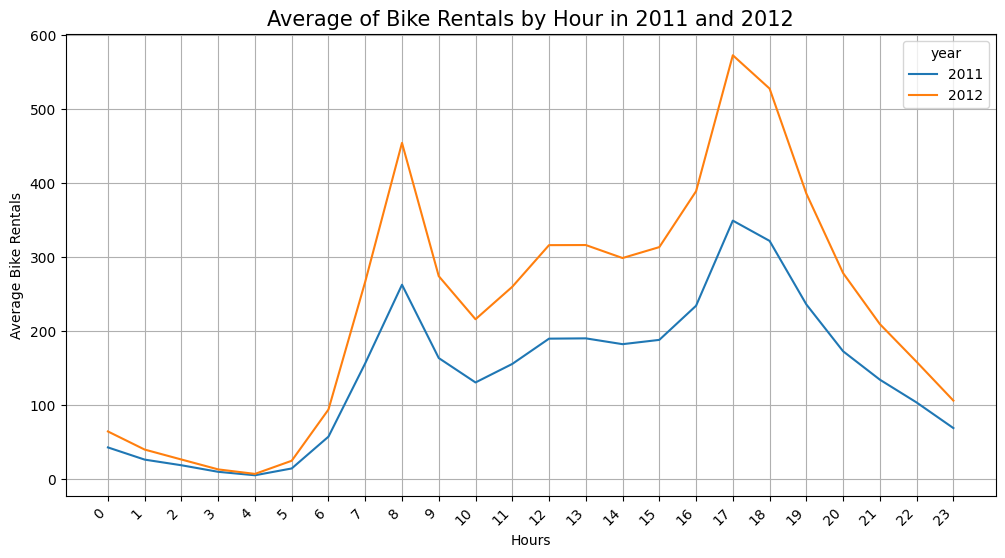

In [34]:
hourly_rental_df = hour_df.groupby(['year', 'hour'])[['count']].mean().reset_index()
time_intervals_labels = [f"{hour}"for hour in range(0, 24)]

plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="count", hue="year",data=hourly_rental_df) 
plt.xlabel("Hours")
plt.ylabel("Average Bike Rentals")
plt.xticks(ticks=range(24), labels=time_intervals_labels, rotation=45, ha='right')
plt.grid(True)
plt.title("Average of Bike Rentals by Hour in 2011 and 2012", loc="center", fontsize=15)

plt.show()

### Pertanyaan 3: Bagaimana persentase penyewaan sepeda berdasarkan musim?

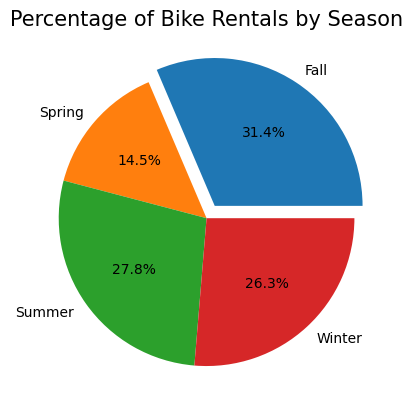

In [35]:
season_df = day_df.groupby('season')[['count']].mean().reset_index()

explode = (0.1, 0, 0, 0)

plt.pie(
    season_df['count'],
    labels = season_df['season'],
    autopct='%1.1f%%',
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'],
    explode=explode
)

plt.title("Percentage of Bike Rentals by Season", loc="center", fontsize=15)
plt.show()

### Pertanyaan 4: Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

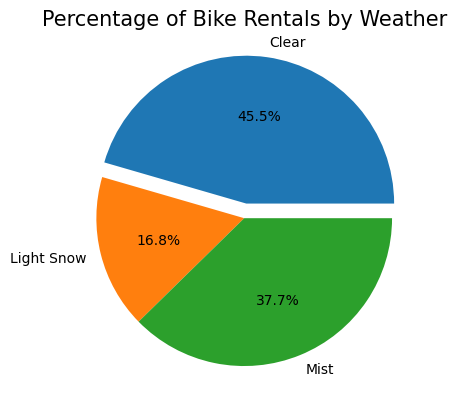

In [36]:
weather_df = day_df.groupby('weather')[['count']].mean().reset_index()

explode = (0.1, 0, 0)

plt.pie(
    weather_df['count'],
    labels = weather_df['weather'],
    autopct='%1.1f%%',
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'],
    explode=explode
)

plt.title("Percentage of Bike Rentals by Weather", loc="center", fontsize=15)
plt.show()

## Conclusion

### Conclution pertanyaan 1

- Terjadi peningkatan penyewaan di tahun 2012
- Performa penyewaan sepeda tertinggi pada bulan **Juni** di tahun 2011 dan **September** di tahun 2012
- Performa penyewaan sepeda terendah pada bulan **Januari**di tahun 2011 dan 2012

Terdapat peningkatan yang cukup signifikan dalam rerata penyewaan sepeda pada tahun 2012 dibandingkan dengan tahun sebelumnya. Hal ini menunjukkan adanya pertumbuhan dalam permintaan akan layanan penyewaan sepeda dari tahun ke tahun. Meskipun terjadi peningkatan secara keseluruhan dari tahun 2011 ke 2012, tren penyewaan sepeda per bulan tidak begitu berbeda secara signifikan. Bulan Januari masih menjadi bulan dengan jumlah penyewaan terendah, sementara bulan-bulan lainnya cenderung memiliki tingkat penyewaan yang relatif konsisten dari tahun ke tahun. Tercatat bahwa terjadi pergeseran dalam bulan dengan penyewaan puncak antara tahun 2011 dan 2012. Pada tahun 2011, puncak penyewaan terjadi pada bulan Juni, sementara pada tahun 2012, puncak penyewaan terjadi pada bulan September. Hal ini menunjukkan adanya variasi dalam preferensi pengguna atau faktor-faktor lain yang memengaruhi pola penyewaan sepeda dari tahun ke tahun. Terdapat pola musiman yang konsisten dalam penyewaan sepeda, dimana jumlah penyewaan cenderung rendah di awal dan akhir tahun, namun mencapai puncaknya pada pertengahan tahun. Hal ini mungkin disebabkan oleh kondisi cuaca, acara-acara tertentu, atau faktor-faktor lain yang mempengaruhi aktivitas luar ruangan.

### Conclution pertanyaan 2

- Terjadi peningkatan penyewaan di tahun 2012
- Performa penyewaan sepeda tertinggi pada pukul **17 atau 5 sore** di tahun 2011 dan 2012
- Performa penyewaan sepeda terendah pada pukul **4 pagi** di tahun 2011 dan 2012

Dari grafik, terlihat bahwa puncak penyewaan sepeda terjadi pada pukul 8 pagi dan 5 sore. Hal ini dapat diasumsikan bahwa pada jam-jam tersebut, orang-orang cenderung ingin berolahraga atau menggunakan sepeda untuk keperluan transportasi. Ini mencerminkan preferensi masyarakat untuk aktifitas fisik pada pagi dan sore hari. Meskipun ada peningkatan penyewaan rata-rata dari jam 6 hingga 23 pada tahun 2012 dibandingkan dengan tahun sebelumnya, namun tidak terjadi perbedaan tren yang signifikan dalam bentuk grafik. Hal ini menunjukkan bahwa pola umum penyewaan sepeda tetap relatif stabil dari tahun 2011 ke 2012.

### Conclution pertanyaan 3

**Musim Gugur adalah musim dengan persentase penyewaan tertinggi**

Berdasarkan pie chart yang dihasilkan. Musim gugur (fall) adalah musim dengan penyewaan sepeda terbanyak, mencapai 31.4%. Hal ini menunjukkan bahwa musim gugur menjadi waktu favorit bagi pengguna untuk menggunkan layanan penyewaan sepeda. Disusul pada musim panas (summer) dengan persentase sebesar 27.8%. selanjutnya musim dingin (winter) dengan persentase 26.3% dan musim semi (spring) memiliki kontribusi terendah dengan persentase 14.5%.

### Conclution pertanyaan 4

**Mayoritas pengguna menyewa sepeda saat cuaca cerah, sekitar 45.5% dari keseluruhan.**

Meskipun terjadi peningkatan penyewaan sepeda secara keseluruhan pada tahun 2012, namun tren penyewaan berdasarkan kondisi cuaca tetap relatif stabil. Ini menunjukkan bahwa faktor-faktor lain mungkin lebih dominan dalam memengaruhi pola penyewaan sepeda daripada perubahan cuaca dari tahun ke tahun. Dari data, terlihat bahwa tidak ada satupun pengguna yang menyewa sepeda saat kondisi cuaca sedang ekstrim, seperti saat *Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog*. Hal ini wajar mengingat kondisi cuaca yang tidak aman atau tidak nyaman bagi pengguna sepeda. Penyewaan sepeda paling banyak terjadi saat cuaca sedang cerah, seperti saat *Clear, Few clouds, Partly cloudy, Partly cloudy* (45.5%). Ini menunjukkan bahwa mayoritas pengguna cenderung memilih bersepeda saat cuaca yang menyenangkan dan bersahabat. Meskipun tidak sebanyak saat cuaca cerah, namun pengguna juga cenderung melakukan penyewaan saat cuaca sedang mendung, seperti *Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist* (37.7%). Hal ini menunjukkan bahwa cuaca mendung belum sepenuhnya menghalangi minat pengguna untuk menggunakan layanan penyewaan sepeda. Meskipun relatif sedikit, namun masih ada sebagian kecil pengguna yang melakukan penyewaan saat cuaca bersalju ringan, seperti *Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds* (16.8%). Ini menunjukkan bahwa beberapa pengguna masih bersedia menggunakan sepeda meskipun dalam kondisi cuaca yang tidak ideal.

### RFM Analysis

Recency (Ketepatan Waktu): Seberapa baru pelanggan melakukan penyewaan sepeda.
Frequency (Frekuensi): Seberapa sering pelanggan melakukan pembelian.
Monetary (Moneter): Berapa banyak uang yang dihabiskan oleh pelanggan.

In [37]:
rfm_df = day_df.groupby(by="instant", as_index=False).agg({
    "dateday": "max",        # Mengambil tanggal terakhir penyewaan sepeda dilakukan
    "weekday": "mean",       # Mengambil Hari dengan penyewaan terbanyak
    "count": "max"           # Menghitung jumlah penyewaan yang telah dilakukan
})

rfm_df.columns = [
    "weekday", 
    "recent_dateday", 
    "frequency",
    "monetary"
]

# menghitung kapan terakhir pelanggan melakukan transaksi (tanggal)
rfm_df["recent_dateday"] = rfm_df["recent_dateday"].dt.date
recent_date = day_df['dateday'].dt.date.max()
rfm_df["recency"] = rfm_df["recent_dateday"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("recent_dateday", axis=1, inplace=True)
rfm_df.head(7)



,weekday,frequency,monetary,recency
0,1,6.0,985,730
1,2,0.0,801,729
2,3,1.0,1349,728
3,4,2.0,1562,727
4,5,3.0,1600,726
5,6,4.0,1606,725
6,7,5.0,1510,724


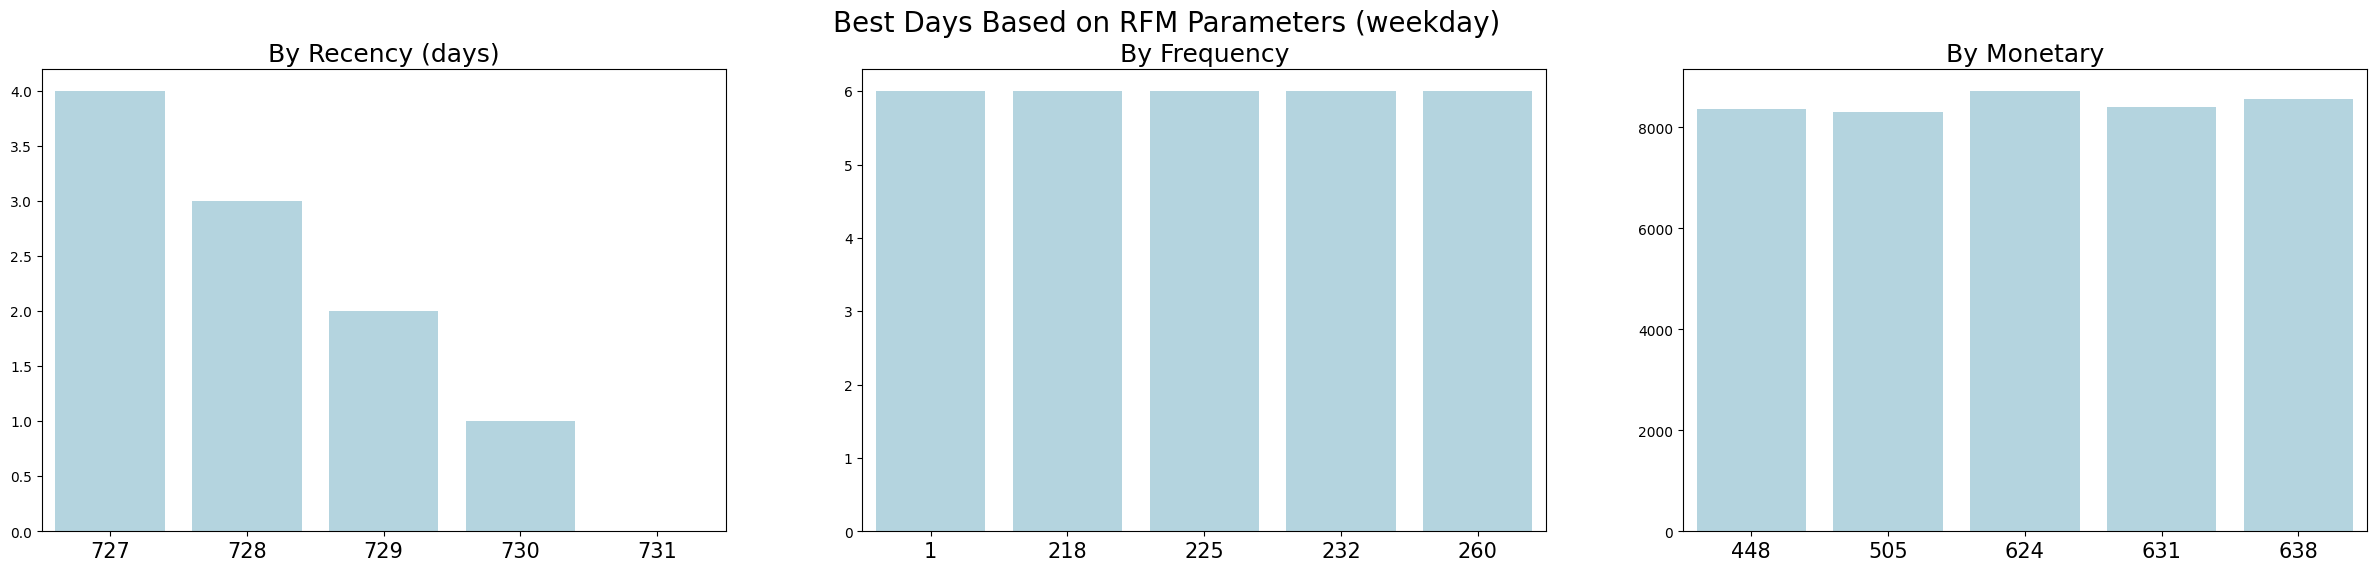

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))


sns.barplot(y="recency", x="weekday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color="lightblue",ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="weekday", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color="lightblue", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="weekday", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color="lightblue", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Days Based on RFM Parameters (weekday)", fontsize=20)
plt.show()

In [39]:
all_df.to_csv("all_data.csv", index=False)